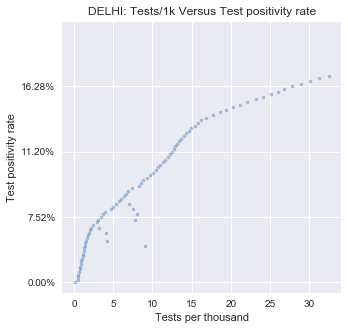

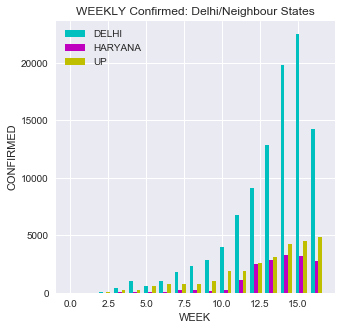

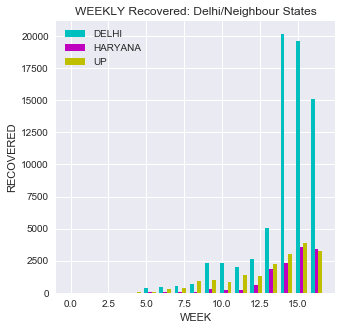

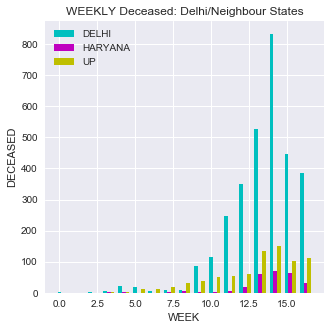

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('seaborn')

CovidDF = pd.read_csv("States_covid_19_india.csv").drop(columns = 'Sno')
PoplDF = pd.read_csv("population_india_census2011.csv").sort_values(by=['State / Union Territory'])
PoplDF.set_index("State / Union Territory", inplace = True)
CovidData = CovidDF.groupby('State/UnionTerritory').sum()
PoplData = pd.DataFrame(PoplDF['Population'])
FinalData = pd.concat([CovidData, PoplData], axis=1, sort=True).dropna().rename_axis("State")
FinalData['IFR'] = FinalData.apply(lambda row: (row.Deaths*100)/row.Confirmed, axis = 1)
FinalData['CMR'] = FinalData.apply(lambda row: (row.Deaths*100)/row.Population, axis = 1)
FinalSELECT = FinalData.loc[['Delhi','Haryana','Uttar Pradesh']]

CovidTEST = pd.read_csv("statewise_tested_numbers_data.csv")
CovidTestFILT = CovidTEST[['Updated On','State','Test positivity rate','Tests per thousand']].dropna()
CovidTestDL = CovidTestFILT[CovidTestFILT['State']=='Delhi']

plt.figure(figsize=(5,5))
plt.scatter(CovidTestDL['Tests per thousand'], CovidTestDL['Test positivity rate'], s=10, alpha=0.4)
plt.yticks([0,25,50,75,100])
plt.title("DELHI: Tests/1k Versus Test positivity rate")
plt.xlabel("Tests per thousand")
plt.ylabel("Test positivity rate")

CovidALL = pd.read_csv("state_wise_daily.csv")
CovidDL = CovidALL[['Date','Status','DL','HR','UP']]

CovidDLConf = CovidDL[CovidDL['Status']=='Confirmed']
CovidDLReco = CovidDL[CovidDL['Status']=='Recovered']
CovidDLDece = CovidDL[CovidDL['Status']=='Deceased']

WEEK = [0]*len(CovidDLConf)
for x in range(0,len(CovidDLConf)):
    WEEK[x] = np.floor(abs(x-len(CovidDLConf))/7)

CovidDLConf.insert(0, "WEEK", WEEK, True) 
CovidDLReco.insert(0, "WEEK", WEEK, True) 
CovidDLDece.insert(0, "WEEK", WEEK, True) 

CovidDLConfWEEK = CovidDLConf.groupby('WEEK').sum().sort_index(axis = 0,ascending=False) 
CovidDLRecoWEEK = CovidDLReco.groupby('WEEK').sum().sort_index(axis = 0,ascending=False)  
CovidDLDeceWEEK = CovidDLDece.groupby('WEEK').sum().sort_index(axis = 0,ascending=False) 

barWidth = 0.25
r1 = np.arange(len(CovidDLConfWEEK))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(5,5))
plt.bar(r1,CovidDLConfWEEK['DL'], color = 'c', width = 0.25, label = 'DELHI')
plt.bar(r2,CovidDLConfWEEK['HR'], color = 'm', width = 0.25, label = 'HARYANA')
plt.bar(r3,CovidDLConfWEEK['UP'], color = 'y', width = 0.25, label = 'UP')
plt.title("WEEKLY Confirmed: Delhi/Neighbour States")
plt.xlabel("WEEK")
plt.ylabel("CONFIRMED")
plt.legend()

plt.figure(figsize=(5,5))
plt.bar(r1,CovidDLRecoWEEK['DL'], color = 'c', width = 0.25, label = 'DELHI')
plt.bar(r2,CovidDLRecoWEEK['HR'], color = 'm', width = 0.25, label = 'HARYANA')
plt.bar(r3,CovidDLRecoWEEK['UP'], color = 'y', width = 0.25, label = 'UP')
plt.title("WEEKLY Recovered: Delhi/Neighbour States")
plt.xlabel("WEEK")
plt.ylabel("RECOVERED")
plt.legend()

plt.figure(figsize=(5,5))
plt.bar(r1,CovidDLDeceWEEK['DL'], color = 'c', width = 0.25, label = 'DELHI')
plt.bar(r2,CovidDLDeceWEEK['HR'], color = 'm', width = 0.25, label = 'HARYANA')
plt.bar(r3,CovidDLDeceWEEK['UP'], color = 'y', width = 0.25, label = 'UP')
plt.title("WEEKLY Deceased: Delhi/Neighbour States")
plt.xlabel("WEEK")
plt.ylabel("DECEASED")
plt.legend()

plt.show()
